In [1]:
from bs4 import BeautifulSoup

In [68]:
final_price_url = "https://www.hemnet.se/salda/bostader?housing_form_groups=apartments&location_ids=18027&page=2"

In [69]:
import requests
r  = requests.get(final_price_url)
data = r.content

In [70]:
soup = BeautifulSoup(data, features="html.parser")

In [71]:
simlified_hits = soup.findAll("div", {"class": "sold-property-listing__location"})

In [72]:
simlified_hits[0]

<div class="sold-property-listing__location">
<h2 class="sold-property-listing__heading">
<span class="property-icon property-icon--result"><svg height="16" viewbox="0 0 13 16" width="13" xmlns="http://www.w3.org/2000/svg"><title>Villa</title><desc><span class="svg-icon__fallback-text">Villa</span></desc><path class="svg-icon__shape" d="M0 6.667v8C0 15.403.582 16 1.3 16h3.9v-5.333h2.6V16h3.9c.718 0 1.3-.597 1.3-1.333v-8L6.5 0 0 6.667z" fill="#008D35" fill-rule="evenodd"></path></svg>
</span>
<span class="item-result-meta-attribute-is-bold item-link">Skältorpsvägen 14B</span>
</h2>
<div>
<span class="hide-element">
        Villa
      </span>
<span class="item-link">
          Vaxmora,
</span>      Sollentuna
    </div>
</div>

In [73]:
simlified_hits[0].findAll("span", {"class": "item-link"})[1].getText()

'\n          Vaxmora,\n'

In [74]:
expand_hits = soup.findAll("div", {"class": "sold-property-listing"})

In [60]:
expand_hits[0].find("div", {"class": "sold-property-listing__location"}).findAll("span", {"class": "item-link"})[1].getText()

'\n          Silverdal,\n'

In [76]:
expand_hits[0].find('div', class_='sold-property-listing__size').getText().splitlines()

['',
 '',
 '',
 '            164\xa0m²',
 '          \xa0',
 '            5\xa0rum',
 '        ',
 '',
 '',
 '          850\xa0m² tomt',
 '        ',
 '',
 '          120\xa0m² biarea',
 '        ']

In [75]:
appartments = []

for hit_property in expand_hits:
    place_name = hit_property.find("div", {"class": "sold-property-listing__location"}).findAll("span", {"class": "item-link"})[1]
    size = hit_property.find('div', class_='sold-property-listing__size')    
    montly = hit_property.find('div', class_='sold-property-listing__price')
    final_str = place_name.getText()+", "+montly.getText()+", "+size.getText()
    appartments.append(final_str)

IndexError: list index out of range

In [10]:
test_unclean = appartments[0].splitlines()

In [11]:
test_unclean = [e.strip() for e in test_unclean]
test_clean = [e for e in test_unclean if len(e) != 0]

In [12]:
test_clean

['Silverdal,',
 ',',
 'Slutpris 2\xa0200\xa0000 kr',
 'Såld  7 augusti 2020',
 '48\xa0889 kr/m²',
 ',',
 '45\xa0m²',
 '2\xa0rum',
 '3\xa0023\xa0kr/mån']

In [13]:
import re
clean_appartments = []
missed_clean_up = []
for aprt in appartments:
    test_unclean = aprt.splitlines()
    test_unclean = [e.strip() for e in test_unclean]
    test_clean = [e for e in test_unclean if len(e) != 0]
    if len(test_clean) == 9 :
        try:
            clean_appartments.append(
                {'region':test_clean[0].replace(",", ""),
                 'price': int(re.sub('[^0-9]','', test_clean[2])),
                 'price_per_size': int(re.sub('[^0-9]','', test_clean[4])),
                 'size':float(test_clean[6].replace(u'\xa0', ' ').replace(" m²","").replace(",",".")),
                 'rooms':float(test_clean[7].replace(u'\xa0', ' ').replace(" rum","").replace(",",".")),
                 'rent': int(re.sub('[^0-9]','', test_clean[8]))
                })
        except ValueError:
            print("Oops!  That was no valid number.  Try again...")
            missed_clean_up.append(test_clean)
    else :
        missed_clean_up.append(test_clean)

Oops!  That was no valid number.  Try again...
Oops!  That was no valid number.  Try again...
Oops!  That was no valid number.  Try again...
Oops!  That was no valid number.  Try again...
Oops!  That was no valid number.  Try again...


In [14]:
clean_appartments

[{'region': 'Silverdal',
  'price': 2200000,
  'price_per_size': 48889,
  'size': 45.0,
  'rooms': 2.0,
  'rent': 3023},
 {'region': 'Häggvik',
  'price': 2175000,
  'price_per_size': 38701,
  'size': 56.2,
  'rooms': 2.0,
  'rent': 3261},
 {'region': 'Häggvik',
  'price': 1800000,
  'price_per_size': 51576,
  'size': 34.9,
  'rooms': 1.0,
  'rent': 2194},
 {'region': 'Edsängen',
  'price': 2210000,
  'price_per_size': 49111,
  'size': 45.0,
  'rooms': 2.0,
  'rent': 2625},
 {'region': 'Edsberg',
  'price': 1900000,
  'price_per_size': 30645,
  'size': 62.0,
  'rooms': 2.0,
  'rent': 3446},
 {'region': 'Kvarnskogen',
  'price': 2730000,
  'price_per_size': 47895,
  'size': 57.0,
  'rooms': 2.0,
  'rent': 3180},
 {'region': 'Helenelund',
  'price': 2800000,
  'price_per_size': 35897,
  'size': 78.0,
  'rooms': 3.0,
  'rent': 4323},
 {'region': 'Sollentuna Kvarnskogen',
  'price': 1765000,
  'price_per_size': 36771,
  'size': 48.0,
  'rooms': 1.5,
  'rent': 2678},
 {'region': 'Rotsunda',

In [15]:
missed_clean_up

[['Kärrdal,',
  ',',
  'Slutpris 5\xa0010\xa0000 kr',
  'Såld  6 augusti 2020',
  ',',
  '126\xa0m²',
  '6\xa0rum',
  '232\xa0m² tomt'],
 ['Helenelund,',
  ',',
  'Slutpris 5\xa0700\xa0000 kr',
  'Såld  6 augusti 2020',
  ',',
  '108\xa0m²',
  '5\xa0rum',
  '4\xa0656\xa0kr/mån'],
 ['Rotebro,',
  ',',
  'Slutpris 5\xa0950\xa0000 kr',
  'Såld  5 augusti 2020',
  ',',
  '130\xa0m²',
  '6\xa0rum',
  '1\xa0092\xa0m² tomt',
  '58\xa0m² biarea'],
 ['Edsängen,',
  ',',
  'Slutpris 3\xa0895\xa0000 kr',
  'Såld  4 augusti 2020',
  ',',
  '92,7\xa0m²',
  '4\xa0rum',
  '126\xa0m² tomt',
  '12,4\xa0m² biarea'],
 ['Norrviken,',
  ',',
  'Slutpris 1\xa0775\xa0000 kr',
  'Såld  3 augusti 2020',
  ',',
  '44,5\xa0m²',
  '1\xa0rum',
  '2\xa0095\xa0kr/mån'],
 ['Sollentuna Rotebro,',
  ',',
  'Slutpris 5\xa0500\xa0000 kr',
  'Såld 31 juli 2020',
  ',',
  '169\xa0m²',
  '7\xa0rum',
  '5\xa0235\xa0kr/mån',
  '5\xa0m² biarea'],
 ['Silverdal,',
  ',',
  'Slutpris 7\xa0400\xa0000 kr',
  'Såld 31 juli 2020',
  

In [20]:
import pandas as pd
df = pd.DataFrame(data=clean_appartments)

In [58]:
df.size

234

In [29]:
! pip install nltk

In [32]:
## TODO: Do one hot encoding 

In [33]:
df.sort_values(by='price', ascending=False)

,region,price,price_per_size,size,rooms,rent
22,Häggvik,4300000,58108,74.0,3.0,4175
30,Häggvik strand,4175000,47989,87.0,4.0,4850
37,Edsängen/Edsberg,3695000,36584,101.0,4.0,5800
11,Edsängen/Edsberg,3650000,37245,98.0,4.0,4956
12,Sollentuna,3050000,57547,53.0,2.0,2578
26,Sollentuna Centrum,3000000,65217,46.0,2.0,2211
6,Helenelund,2800000,35897,78.0,3.0,4323
17,Helenelund,2800000,35897,78.0,3.0,4817
14,Sollentuna Centrum,2740000,68500,40.0,2.0,2858
5,Kvarnskogen,2730000,47895,57.0,2.0,3180


In [37]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

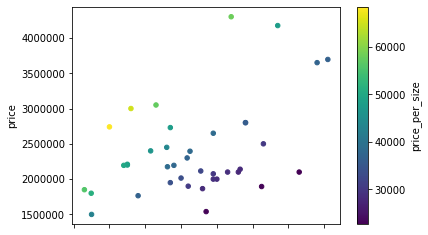

In [26]:
df.plot.scatter(x='size',y='price',c='price_per_size', colormap='viridis')

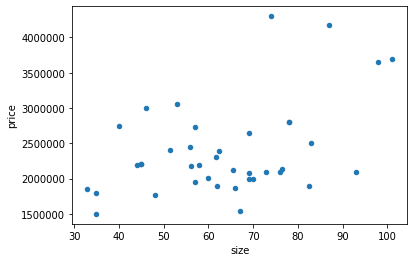

In [27]:
df.plot.scatter(x='size',y='price')

In [67]:
df.to_csv('test_data.csv',encoding='utf-8',index=False)

In [41]:
df.plot.density

SyntaxError: invalid syntax (<ipython-input-41-642092bcf0c0>, line 1)

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [45]:
enc.categories_

[array(['Centrala Sollentuna', 'Edsberg', 'Edsviken', 'Edsängen',
        'Edsängen/Edsberg', 'Helenelund', 'Häggvik', 'Häggvik strand',
        'Kvarnskogen', 'Kärrdal', 'Norrviken', 'Rotebro', 'Rotsunda',
        'Silverdal', 'Sjöberg', 'Sollentuna', 'Sollentuna Centrum',
        'Sollentuna Kvarnskogen', 'Sollentuna Rotebro',
        'Tureberg Sollentuna'], dtype=object),
 array([1500000, 1540000, 1765000, 1800000, 1850000, 1865000, 1895000,
        1900000, 1950000, 2000000, 2015000, 2075000, 2100000, 2115000,
        2140000, 2175000, 2195000, 2200000, 2210000, 2300000, 2395000,
        2400000, 2450000, 2500000, 2650000, 2730000, 2740000, 2800000,
        3000000, 3050000, 3650000, 3695000, 4175000, 4300000]),
 array([22581, 22970, 22985, 27632, 27974, 28258, 28571, 28767, 28986,
        30072, 30120, 30645, 32290, 33583, 34211, 35897, 36584, 36771,
        37245, 37277, 37845, 38320, 38406, 38701, 42857, 43750, 46602,
        47895, 47989, 48889, 49111, 49886, 51576, 56061, 5754

In [54]:
edsviken_df = df[(df['region'] == "Häggvik")]

In [55]:
edsviken_df.head()

,region,price,price_per_size,size,rooms,rent
1,Häggvik,2175000,38701,56.2,2.0,3261
2,Häggvik,1800000,51576,34.9,1.0,2194
22,Häggvik,4300000,58108,74.0,3.0,4175
28,Häggvik,2100000,28767,73.0,3.0,5824
35,Häggvik,2015000,33583,60.0,2.0,3413


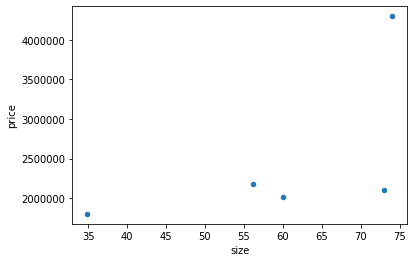

In [57]:
edsviken_df.plot.scatter(x='size',y='price')

In [94]:
data = pd.read_csv("test_data_full.csv",header=0,index_col=False)

In [95]:
data.head()

,region,price,price_per_size,size,rooms,rent
0,Viggbyholm,1600000,59259,27.0,1.0,2171
1,Ektorp,1550000,77500,20.0,1.0,983
2,Årsta,2200000,73333,30.0,1.0,2455
3,Midsommarkransen/Telefonplan,2480000,88571,28.0,1.0,1552
4,Bromma / Mariehäll,2150000,71667,30.0,1.0,1945


In [96]:
data

,region,price,price_per_size,size,rooms,rent
0,Viggbyholm,1600000,59259,27.0,1.0,2171
1,Ektorp,1550000,77500,20.0,1.0,983
2,Årsta,2200000,73333,30.0,1.0,2455
3,Midsommarkransen/Telefonplan,2480000,88571,28.0,1.0,1552
4,Bromma / Mariehäll,2150000,71667,30.0,1.0,1945
...,...,...,...,...,...,...
19164,Vasastan,5600000,86154,65.0,2.0,2081
19165,Södermalm/Högalid,5925000,71386,83.0,3.0,3673
19166,Södermalm,6905000,94589,73.0,2.5,2953
19167,Östermalm,6150000,106034,58.0,2.0,2054


In [97]:
edsviken_df = data[(data['region'] == "Häggvik")]

In [98]:
data.columns.tolist()

['region', 'price', 'price_per_size', 'size', 'rooms', 'rent']

In [99]:
edsviken_df

,region,price,price_per_size,size,rooms,rent
819,Häggvik,1700000,68000,25.0,1.0,1599
1923,Häggvik,1800000,51576,34.9,1.0,2194
2739,Häggvik,2470000,50408,49.0,2.0,2920
3418,Häggvik,1995000,53919,37.0,1.0,2143
3701,Häggvik,1950000,56358,34.6,1.0,1719
4005,Häggvik,2175000,38701,56.2,2.0,3261
4107,Häggvik,1800000,51576,34.9,1.0,2194
4933,Häggvik,2015000,33583,60.0,2.0,3413
5582,Häggvik,2470000,50408,49.0,2.0,2920
6185,Häggvik,2175000,38701,56.2,2.0,3261


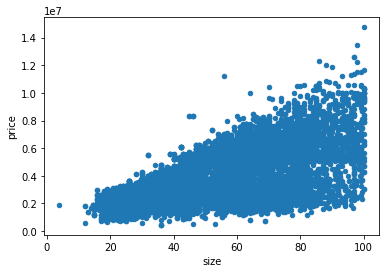

In [104]:
data.plot.scatter(x='size',y='price')

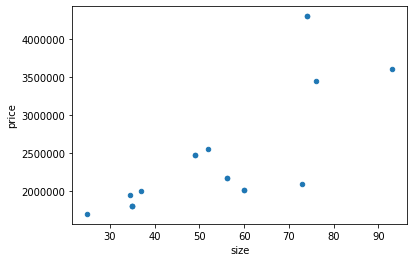

In [105]:
edsviken_df.plot.scatter(x='size',y='price')

In [106]:
ostermalm_df = data[(data['region'] == "Östermalm")]

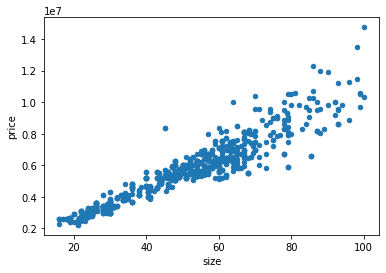

In [107]:
ostermalm_df.plot.scatter(x='size',y='price')

In [108]:
sodermalm_df = data[(data['region'] == "Södermalm")]

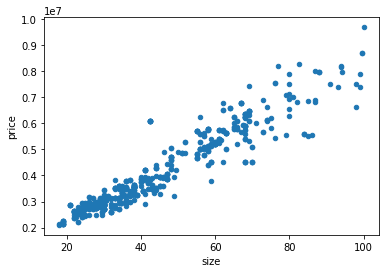

In [109]:
sodermalm_df.plot.scatter(x='size',y='price')